In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)
xgb = XGBRegressor()
lgbm = lgb.LGBMRegressor()
ridge = Ridge()

### Without Passthrough

In [6]:
stacking_regressor2 = StackingRegressor(estimators=[('LGBM', lgbm),('CB', cb)], final_estimator=ridge,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=False)

In [7]:
stacking_regressor2.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('LGBM', LGBMRegressor()),
                              ('CB',
                               <catboost.core.CatBoostRegressor object at 0x7fd4b434d1c0>)],
                  final_estimator=Ridge())

In [8]:
stacking_regressor2.score(X,y)

0.9915004598526347

In [9]:
stacking_regressor4 = StackingRegressor(estimators=[('LGBM', lgbm),('CB', cb)], final_estimator=ridge,
                                       cv=5,
                                       passthrough=False)

In [10]:
stacking_regressor4.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('LGBM', LGBMRegressor()),
                              ('CB',
                               <catboost.core.CatBoostRegressor object at 0x7fd4b434d1c0>)],
                  final_estimator=Ridge())

In [11]:
stacking_regressor4.score(X,y)

0.9916732020585799

In [12]:
scores4 = cross_validate(stacking_regressor4, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [13]:
scores4

{'fit_time': array([11.82497001, 11.29758906, 11.38634706, 10.30265236, 10.21312189]),
 'score_time': array([0.00843596, 0.00701594, 0.00671196, 0.00659299, 0.00746703]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('LGBM', LGBMRegressor()),
                                ('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fd4a152f610>)],
                    final_estimator=Ridge()),
  StackingRegressor(cv=5,
                    estimators=[('LGBM', LGBMRegressor()),
                                ('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fd4909e4880>)],
                    final_estimator=Ridge()),
  StackingRegressor(cv=5,
                    estimators=[('LGBM', LGBMRegressor()),
                                ('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fd4909cf9d0>)],
                    final_estimator=Ridge()),
  StackingRegressor(c

In [14]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [15]:
cat = evaluate_model(cb, X, y)

In [16]:
cat

,fit_time,score_time,test_score
0,5.720813,0.008610,0.926950
1,6.042995,0.026081,0.898789
2,5.920580,0.008317,0.936517
3,9.868093,0.020767,0.929022
4,9.255210,0.023327,0.950638
5,5.309711,0.005006,0.936688
6,5.692345,0.007820,0.942846
7,9.562234,0.025929,0.926769
8,4.457273,0.005749,0.945508
9,4.767425,0.005785,0.884738


In [17]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [18]:
cat

,cat_score
0,0.926950
1,0.898789
2,0.936517
3,0.929022
4,0.950638
5,0.936688
6,0.942846
7,0.926769
8,0.945508
9,0.884738


In [19]:
df4 = evaluate_model(stacking_regressor4, X, y)

In [20]:
df4

,fit_time,score_time,test_score
0,34.026231,0.019033,0.926739
1,34.462317,0.014212,0.896279
2,50.751251,0.049436,0.936593
3,52.053616,0.053576,0.929732
4,50.995308,0.050348,0.950044
5,34.413396,0.015247,0.936312
6,53.120638,0.049017,0.942191
7,46.170179,0.046019,0.927332
8,27.676406,0.016925,0.945635
9,27.536807,0.014796,0.885142


In [21]:
df4 = df4[['test_score']].rename(columns={'test_score':'test_score_4'})

In [22]:
df4

,test_score_4
0,0.926739
1,0.896279
2,0.936593
3,0.929732
4,0.950044
5,0.936312
6,0.942191
7,0.927332
8,0.945635
9,0.885142


In [23]:
combo = pd.concat([cat, df4], axis=1)

In [24]:
combo

,cat_score,test_score_4
0,0.926950,0.926739
1,0.898789,0.896279
2,0.936517,0.936593
3,0.929022,0.929732
4,0.950638,0.950044
5,0.936688,0.936312
6,0.942846,0.942191
7,0.926769,0.927332
8,0.945508,0.945635
9,0.884738,0.885142


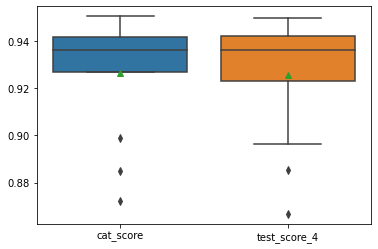

In [25]:
sns.boxplot(data=combo, showmeans=True);

In [26]:
combo.describe()

,cat_score,test_score_4
count,15.000000,15.000000
mean,0.926683,0.925774
std,0.023191,0.024358
min,0.872051,0.866622
25%,0.926860,0.923287
50%,0.936517,0.936312
75%,0.942064,0.942469
max,0.950638,0.950044
